In [ ]:
# features engineering according to raw02.ipynb

import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)

cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info  

<bound method DataFrame.info of     Agricultural Zone   Month  Week  Rainfall (mm)  Mean Temp. (*C)  \
1               Bogra  August     1           63.3             29.3   
4               Dhaka    July     2           73.5             29.1   
5            Dinajpur    June     4           96.0             29.2   
6            Faridpur    July     4           84.5             29.0   
7              Khulna  August     3           76.5             29.1   
..                ...     ...   ...            ...              ...   
368            Khulna     May     1           17.5             30.1   
369           Jashore    June     1           49.5             30.7   
370          Faridpur   April     1           18.0             28.5   
371          Dinajpur   April     1            8.0             26.7   
372             Dhaka     May     1           21.0             29.0   

     RHmean (%)  SShr (hrs)  WD (deg)  WS (Km/hr) label  
1          83.6        35.0     137.0         6.3  Aman  

In [5]:
target_per_class = 50

import numpy as np
import pandas as pd

augmented_data = []

numeric_cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.30)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data) 

data = pd.concat([data, augmented_df], ignore_index=True)


In [6]:
# encodings (feature engineering)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data['zone_encoded'] = label_encoder.fit_transform(data['Agricultural Zone'])
data.drop(columns=['Agricultural Zone'], axis=1, inplace=True)
zone_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(zone_mapping)

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['Month'] = data['Month'].map(month_map)

data['Month_Week'] = data['Month'] + (data['Week']/4) - 0.25
data.drop(columns=['Month','Week'], axis=1, inplace=True)
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,zone_encoded,Month_Week
0,63.3,29.3,83.6,35.0,137.0,6.3,0,1,8.00
1,73.5,29.1,83.0,32.0,159.0,5.9,0,4,7.25
2,96.0,29.2,83.0,31.0,121.0,3.7,0,5,6.75
3,84.5,29.0,85.5,32.0,180.0,5.6,0,6,7.75
4,76.5,29.1,85.6,31.0,170.0,6.5,0,8,8.50


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [9]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

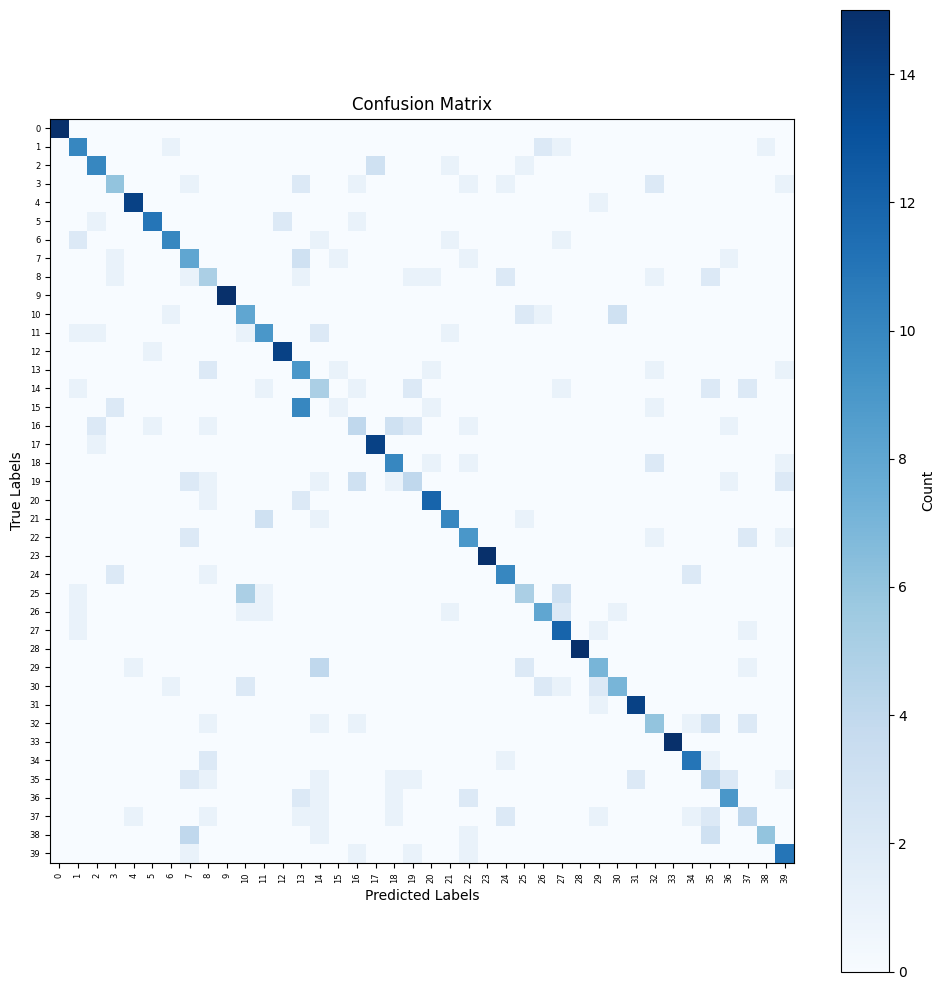

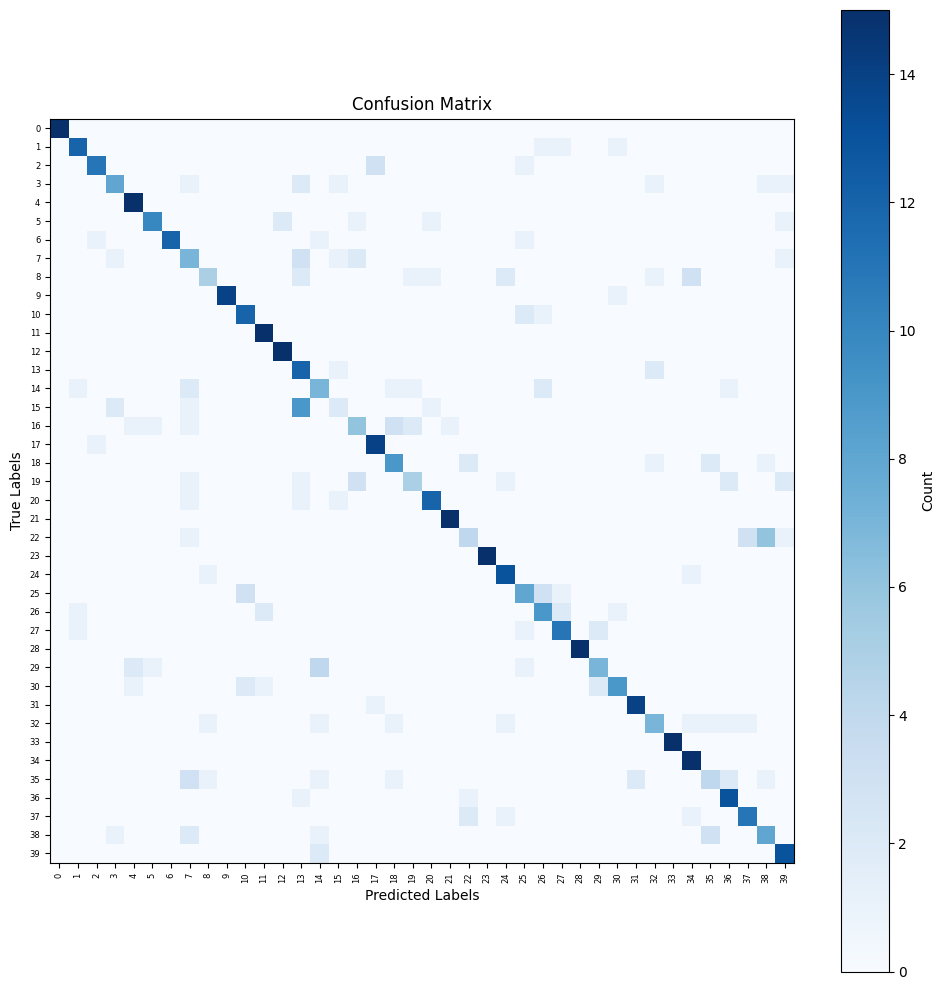

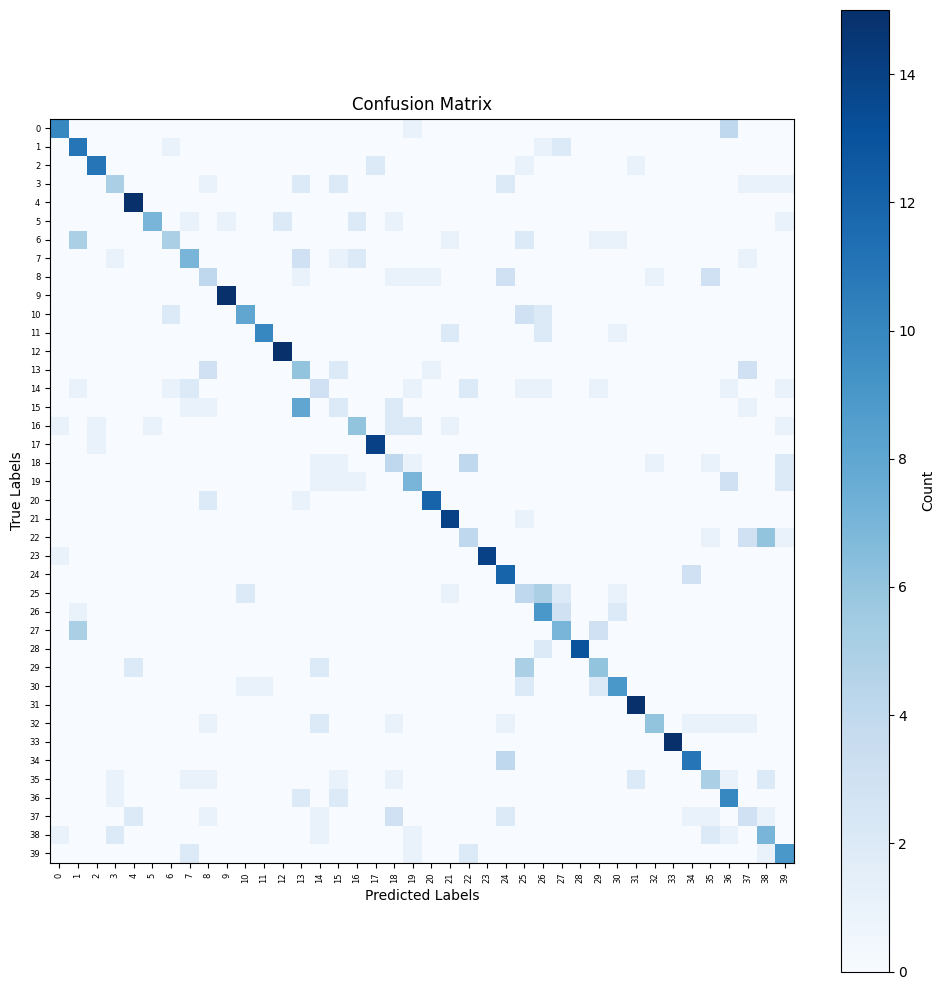

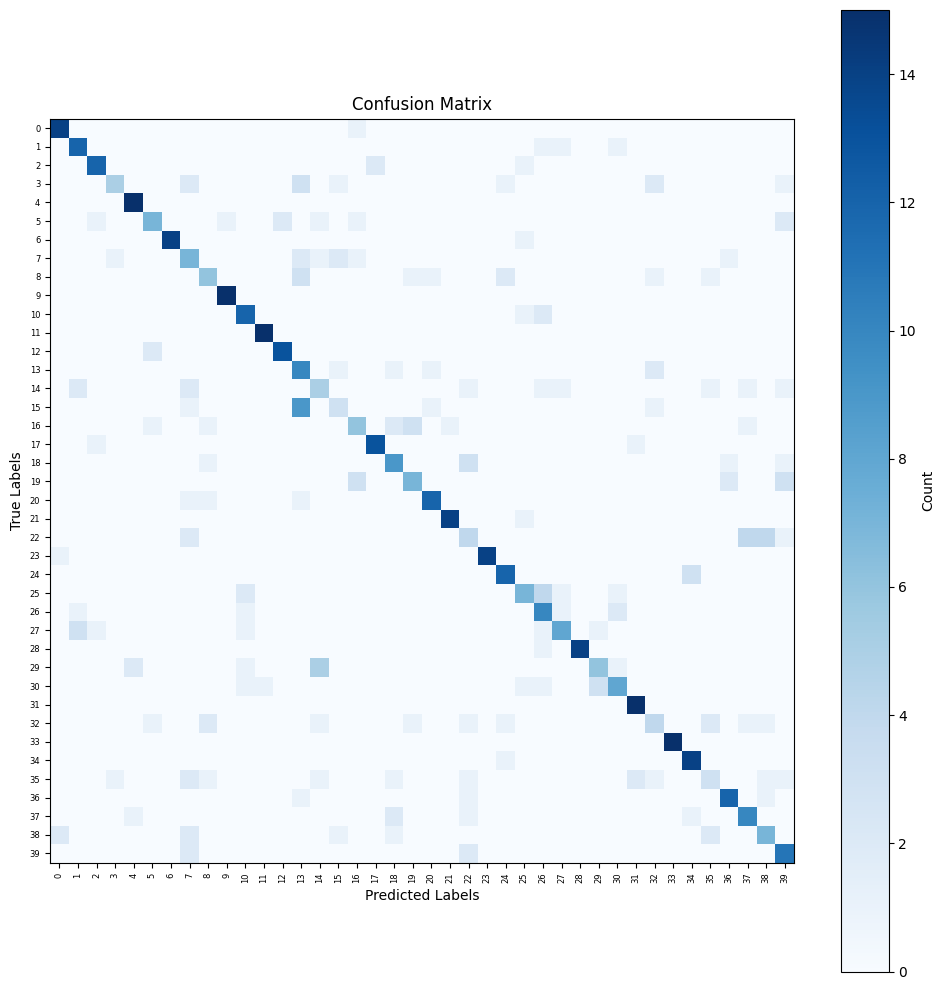

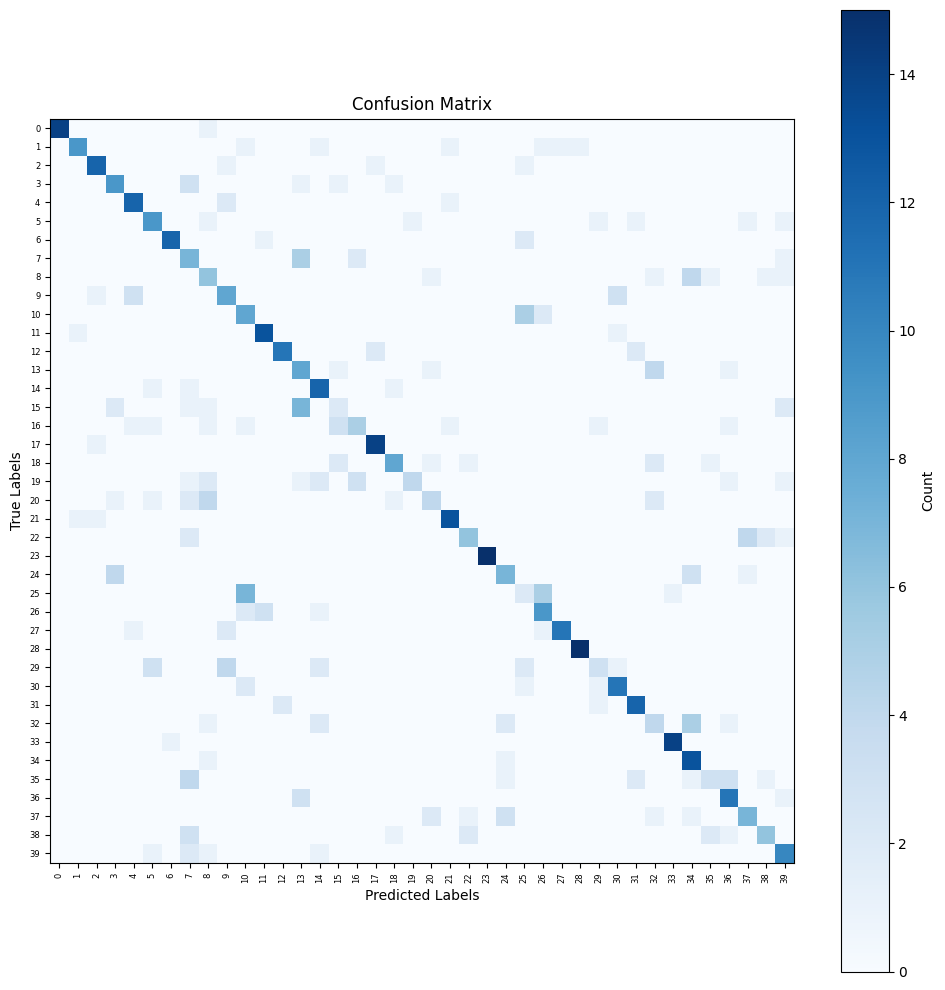

Learning rate set to 0.080496
0:	learn: 3.5649240	total: 203ms	remaining: 3m 22s
1:	learn: 3.4571860	total: 265ms	remaining: 2m 12s
2:	learn: 3.3450448	total: 331ms	remaining: 1m 49s
3:	learn: 3.2446513	total: 390ms	remaining: 1m 37s
4:	learn: 3.1454643	total: 442ms	remaining: 1m 27s
5:	learn: 3.0824293	total: 492ms	remaining: 1m 21s
6:	learn: 3.0085735	total: 540ms	remaining: 1m 16s
7:	learn: 2.9304259	total: 592ms	remaining: 1m 13s
8:	learn: 2.8644159	total: 638ms	remaining: 1m 10s
9:	learn: 2.8071882	total: 684ms	remaining: 1m 7s
10:	learn: 2.7490081	total: 732ms	remaining: 1m 5s
11:	learn: 2.6967934	total: 789ms	remaining: 1m 4s
12:	learn: 2.6484692	total: 834ms	remaining: 1m 3s
13:	learn: 2.5948428	total: 878ms	remaining: 1m 1s
14:	learn: 2.5463104	total: 925ms	remaining: 1m
15:	learn: 2.4905841	total: 971ms	remaining: 59.7s
16:	learn: 2.4650170	total: 1.02s	remaining: 59.2s
17:	learn: 2.4208282	total: 1.07s	remaining: 58.6s
18:	learn: 2.3874972	total: 1.12s	remaining: 57.9s
19:	l

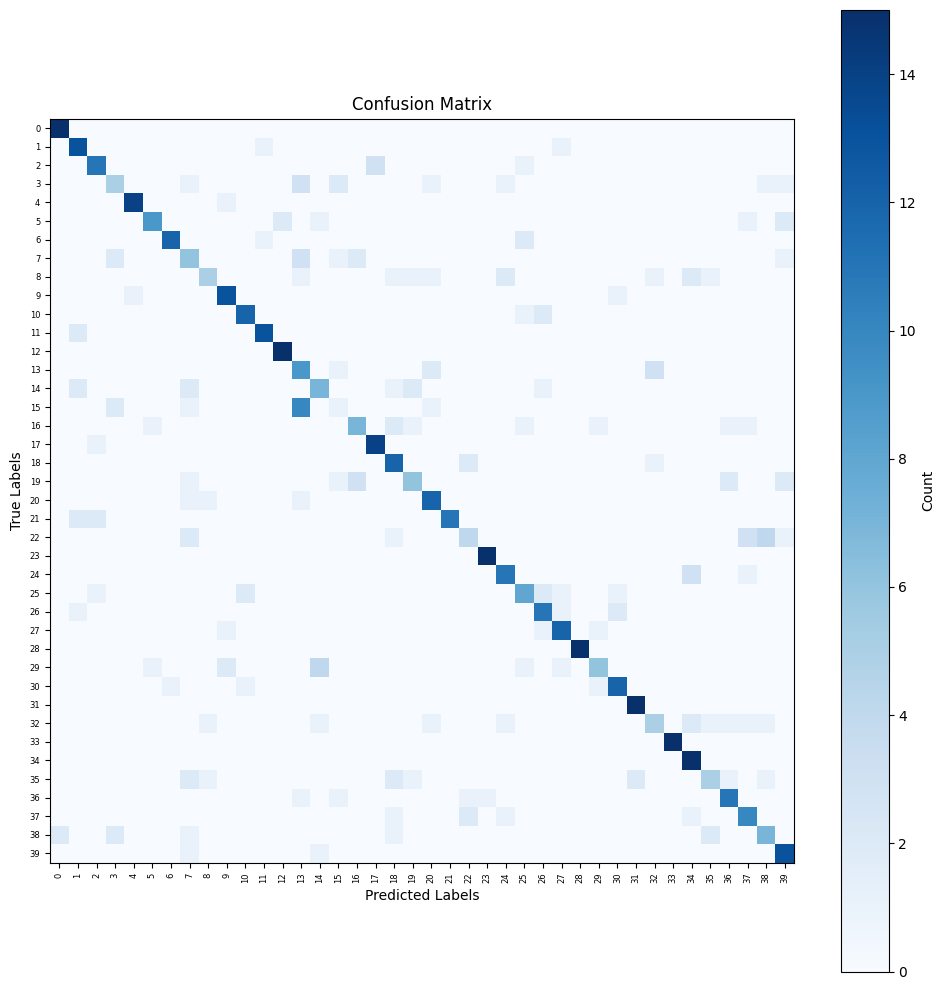

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 8
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] 

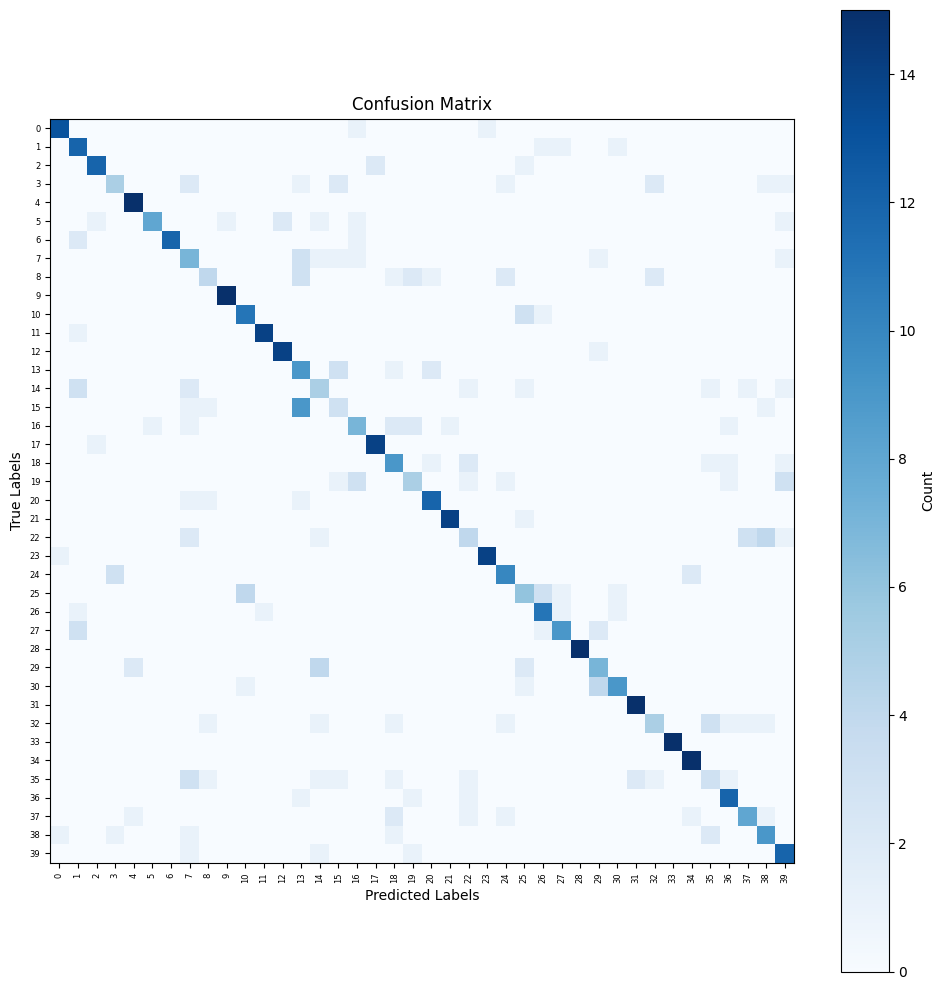

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,KNN,CatBoost,LightGBM
Accuracy,0.620000,0.706667,0.583333,0.666667,0.598333,0.686667,0.665000
Precision,0.626027,0.705012,0.594620,0.666049,0.610310,0.682300,0.665987
Recall,0.620000,0.706667,0.583333,0.666667,0.598333,0.686667,0.665000
F1 Score,0.614524,0.696102,0.579088,0.657995,0.590910,0.674647,0.657551


In [10]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data